# ❤️ Lovely Tensors

> After all, you are only human.

## [Read full docs](https://xl0.github.io/lovely-tensors) | ❤️‍🔥 [Lovely `JAX`](https://github.com/xl0/lovely-jax) |

## Install

```sh
pip install lovely-tensors
```

## How to use

In [ ]:
# |hide
import torch
from PIL import Image
from fastcore.test import test_eq

In [ ]:
# |hide
torch.set_printoptions(linewidth=120)

In [ ]:
# |hide
# Don't depend on torchvision
# numbers = VF.normalize(VF.center_crop(VF.to_tensor(Image.open("tenchman.jpg")), 196), **in_stats)
numbers = torch.load("mysteryman.pt")
numbers1 = numbers

How often do you find yourself debugging PyTorch code? You dump a tensor to the cell output, and see this:

In [ ]:
# |hide
import lovely_tensors as lt

In [ ]:
# |hide
# A trick to make sure README.md shows the plain version.
lt.monkey_patch()
numbers = numbers.p

In [ ]:
numbers 

tensor([[[-0.3541, -0.3369, -0.4054,  ..., -0.5596, -0.4739,  2.2489],
         [-0.4054, -0.4226, -0.4911,  ..., -0.9192, -0.8507,  2.1633],
         [-0.4739, -0.4739, -0.5424,  ..., -1.0390, -1.0390,  2.1975],
         ...,
         [-0.9020, -0.8335, -0.9363,  ..., -1.4672, -1.2959,  2.2318],
         [-0.8507, -0.7822, -0.9363,  ..., -1.6042, -1.5014,  2.1804],
         [-0.8335, -0.8164, -0.9705,  ..., -1.6555, -1.5528,  2.1119]],

        [[-0.1975, -0.1975, -0.3025,  ..., -0.4776, -0.3725,  2.4111],
         [-0.2500, -0.2325, -0.3375,  ..., -0.7052, -0.6702,  2.3585],
         [-0.3025, -0.2850, -0.3901,  ..., -0.7402, -0.8102,  2.3761],
         ...,
         [-0.4251, -0.2325, -0.3725,  ..., -1.0903, -1.0203,  2.4286],
         [-0.3901, -0.2325, -0.4251,  ..., -1.2304, -1.2304,  2.4111],
         [-0.4076, -0.2850, -0.4776,  ..., -1.2829, -1.2829,  2.3410]],

        [[-0.6715, -0.9853, -0.8807,  ..., -0.9678, -0.6890,  2.3960],
         [-0.7238, -1.0724, -0.9678,  ..., -1

In [ ]:
# | hide
numbers = numbers1

Was it really useful for you, as a human, to see all these numbers?

What is the shape? The size?\
What are the statistics?\
Are any of the values `nan` or `inf`?\
Is it an image of a man holding a tench?

In [ ]:
import lovely_tensors as lt

In [ ]:
lt.monkey_patch()

## `__repr__`

In [ ]:
numbers # torch.Tensor

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073

Better, huh?

In [ ]:
numbers[1,:6,1] # Still shows values if there are not too many.

tensor[6] x∈[-0.443, -0.197] μ=-0.311 σ=0.091 [-0.197, -0.232, -0.285, -0.373, -0.443, -0.338]

In [ ]:
spicy = numbers[0,:12,0].clone()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
spicy # Spicy stuff

tensor[2, 6] n=12 x∈[-3.541e+03, -4.054e-05] μ=-393.842 σ=1.180e+03 +Inf! -Inf! NaN!

In [ ]:
torch.zeros(10, 10) # A zero tensor - make it obvious

tensor[10, 10] all_zeros

In [ ]:
spicy.v # Verbose

tensor[2, 6] n=12 x∈[-3.541e+03, -4.054e-05] μ=-393.842 σ=1.180e+03 +Inf! -Inf! NaN!
tensor([[-3.5405e+03, -4.0543e-05,         inf,        -inf,         nan, -6.1093e-01],
        [-6.1093e-01, -5.9380e-01, -5.9380e-01, -5.4243e-01, -5.4243e-01, -5.4243e-01]])

In [ ]:
spicy.p # The plain old way

tensor([[-3.5405e+03, -4.0543e-05,         inf,        -inf,         nan, -6.1093e-01],
        [-6.1093e-01, -5.9380e-01, -5.9380e-01, -5.4243e-01, -5.4243e-01, -5.4243e-01]])

## Going `.deeper`

In [ ]:
numbers.deeper

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

In [ ]:
# You can go deeper if you need to
numbers[:,:3,:5].deeper(2)

tensor[3, 3, 5] n=45 x∈[-1.316, -0.197] μ=-0.593 σ=0.306
  tensor[3, 5] n=15 x∈[-0.765, -0.337] μ=-0.492 σ=0.124
    tensor[5] x∈[-0.440, -0.337] μ=-0.385 σ=0.041 [-0.354, -0.337, -0.405, -0.440, -0.388]
    tensor[5] x∈[-0.662, -0.405] μ=-0.512 σ=0.108 [-0.405, -0.423, -0.491, -0.577, -0.662]
    tensor[5] x∈[-0.765, -0.474] μ=-0.580 σ=0.125 [-0.474, -0.474, -0.542, -0.645, -0.765]
  tensor[3, 5] n=15 x∈[-0.513, -0.197] μ=-0.321 σ=0.099
    tensor[5] x∈[-0.303, -0.197] μ=-0.243 σ=0.055 [-0.197, -0.197, -0.303, -0.303, -0.215]
    tensor[5] x∈[-0.408, -0.232] μ=-0.327 σ=0.084 [-0.250, -0.232, -0.338, -0.408, -0.408]
    tensor[5] x∈[-0.513, -0.285] μ=-0.394 σ=0.102 [-0.303, -0.285, -0.390, -0.478, -0.513]
  tensor[3, 5] n=15 x∈[-1.316, -0.672] μ=-0.964 σ=0.176
    tensor[5] x∈[-0.985, -0.672] μ=-0.846 σ=0.123 [-0.672, -0.985, -0.881, -0.776, -0.916]
    tensor[5] x∈[-1.212, -0.724] μ=-0.989 σ=0.179 [-0.724, -1.072, -0.968, -0.968, -1.212]
    tensor[5] x∈[-1.316, -0.828] μ=-1.058 σ=0.1

## Now in `.rgb` color

The important queston - is it our man?

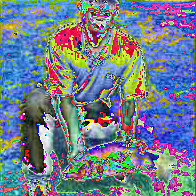

In [ ]:
numbers.rgb

_Maaaaybe?_ Looks like someone normalized him.

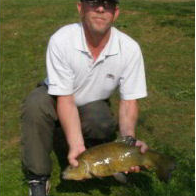

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std

# numbers.rgb(in_stats, cl=True) # For channel-last input format
numbers.rgb(in_stats)

It's indeed our hero, the Tenchman!

## `.plt` the statistics

In [ ]:
# |hide
torch.manual_seed(42) # For reproducibility of flots, otherwise we updatem the images in git every time.

<torch._C.Generator>

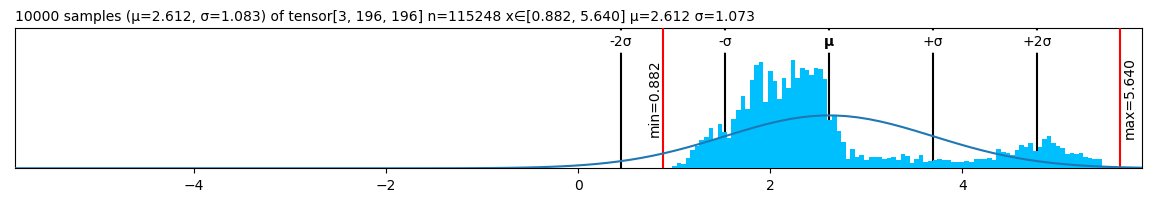

In [ ]:
(numbers+3).plt

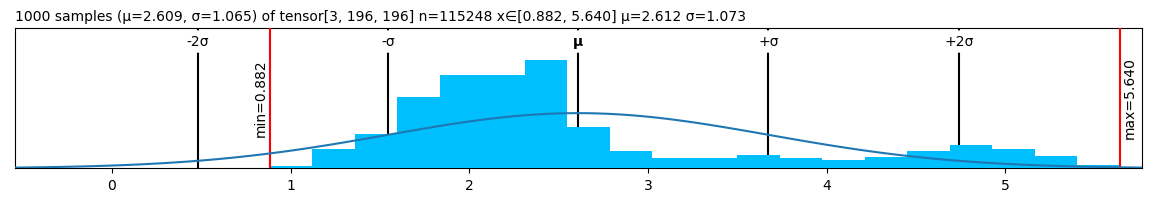

In [ ]:
(numbers+3).plt(center="mean", max_s=1000)

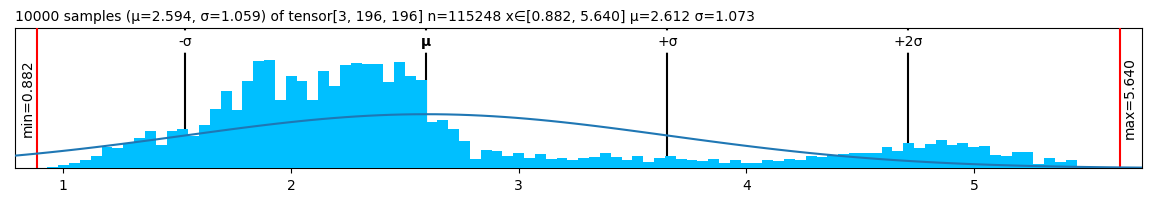

In [ ]:
(numbers+3).plt(center="range")

## See the `.chans`

In [ ]:
# .chans will map values betwen [0,1] to colors.
# Make our values fit into that range to avoid clipping.
mean = torch.tensor(in_stats[0])[:,None,None]
std = torch.tensor(in_stats[1])[:,None,None]
numbers_01 = (numbers*std + mean)
numbers_01

tensor[3, 196, 196] n=115248 x∈[0., 1.000] μ=0.361 σ=0.248

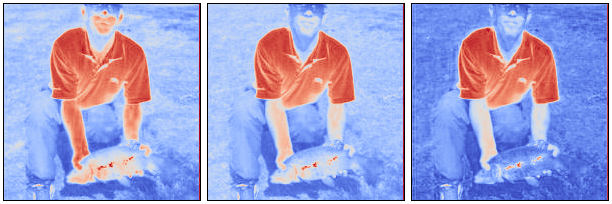

In [ ]:
numbers_01.chans

Let's try with a Convolutional Neural Network

In [ ]:
# |eval:false
from torchvision.models import vgg11

In [ ]:
# |eval:false
features = vgg11().features

# I saved the first 5 layers in "features.pt"
_ = features.load_state_dict(torch.load("../features.pt"), strict=False)

In [ ]:
# |eval:false
# Activatons of the second max pool layer of VGG11
acts = (features[:6](numbers[None])[0]/2) # /2 to reduce clipping
acts

tensor[128, 49, 49] n=307328 x∈[0., 12.508] μ=0.367 σ=0.634 grad DivBackward0

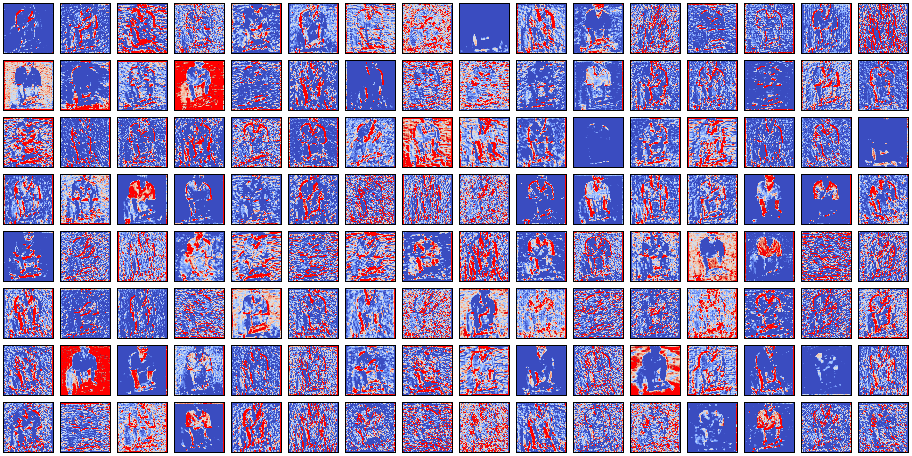

In [ ]:
# |eval:false
acts.chans

## Grouping (`.rgb` and `.chans` )

In [ ]:
# Make 8 images with progressively higher brightness and stack them 2x2x2.
eight_images = (torch.stack([numbers]*8)
                    .add(torch.linspace(-3, 3, 8)[:,None,None,None])
                    .mul(torch.tensor(in_stats[1])[:,None,None])
                    .add(torch.tensor(in_stats[0])[:,None,None])
                    .clamp(0,1)
                    .view(2,2,2,3,196,196)
)
eight_images

tensor[2, 2, 2, 3, 196, 196] n=921984 x∈[0., 1.000] μ=0.411 σ=0.369

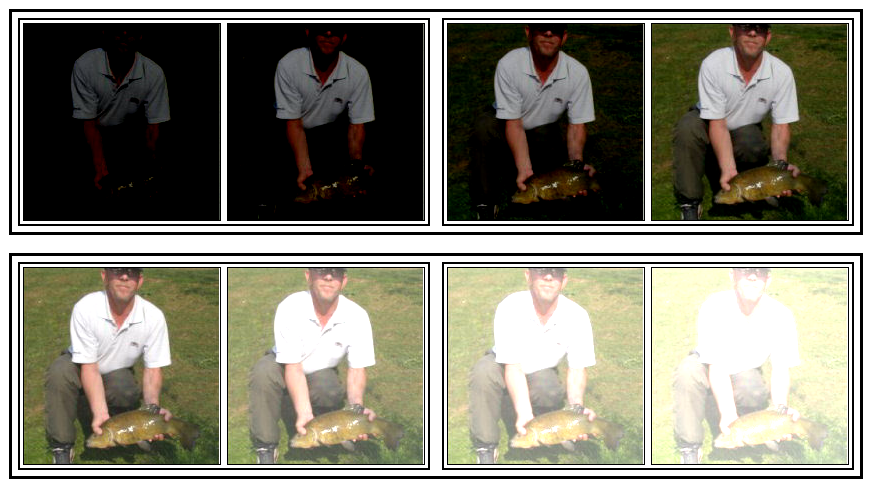

In [ ]:
eight_images.rgb

In [ ]:
# |eval:false
# Weights of the second conv layer of VGG11
features[3].weight

Parameter containing:
Parameter[128, 64, 3, 3] n=73728 x∈[-0.783, 0.776] μ=-0.004 σ=0.065 grad

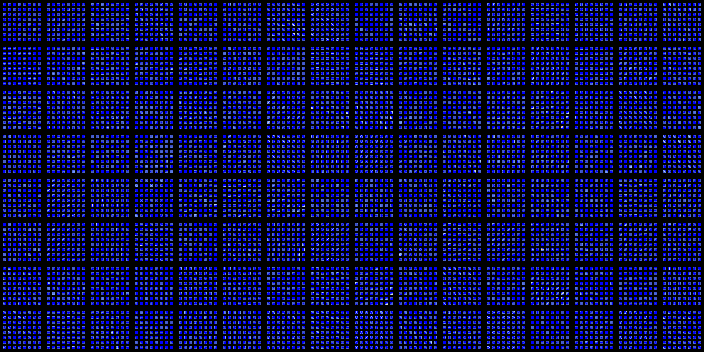

In [ ]:
# |eval:false
# Weights of the second conv layer (64ch -> 128ch) of VGG11,
# grouped per output channel.
features[3].weight.chans(frame_px=1, gutter_px=0)

## Without `.monkey_patch`

In [ ]:
lt.lovely(spicy)

tensor[2, 6] n=12 x∈[-3.541e+03, -4.054e-05] μ=-393.842 σ=1.180e+03 +Inf! -Inf! NaN!

In [ ]:
lt.lovely(spicy, verbose=True)

tensor[2, 6] n=12 x∈[-3.541e+03, -4.054e-05] μ=-393.842 σ=1.180e+03 +Inf! -Inf! NaN!
tensor([[-3.5405e+03, -4.0543e-05,         inf,        -inf,         nan, -6.1093e-01],
        [-6.1093e-01, -5.9380e-01, -5.9380e-01, -5.4243e-01, -5.4243e-01, -5.4243e-01]])

In [ ]:
lt.lovely(numbers, depth=1)

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

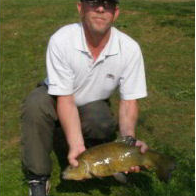

In [ ]:
lt.rgb(numbers, in_stats)

In [ ]:
# |hide
torch.manual_seed(42) # For reproducibility of flots, otherwise we update the images in git every time.

<torch._C.Generator>

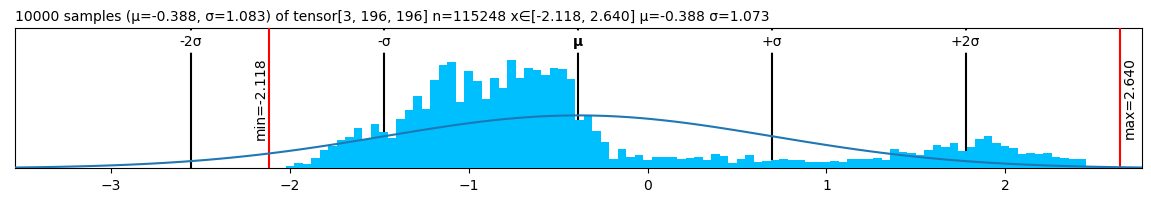

In [ ]:
lt.plot(numbers, center="mean")

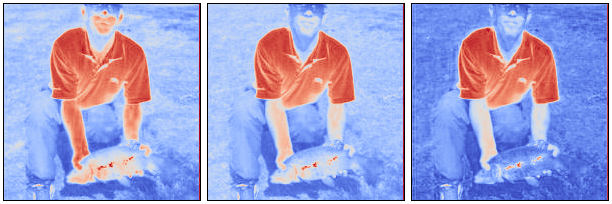

In [ ]:
lt.chans(numbers_01)